Predicción de la calidad de vinos usando Árboles de Regresión
===

* *45 min* | Ultima modificación: Junio 22, 2019

## Definición del problema

Usualmente el vino es calificado por expertos humanos una vez se ha finalizado su producción. Los productore están interesados en poder estimar dicha calificación con el fin de poder planificar y mejorar la producción de vinos, debido a sus inmensas implicaciones económicas. Se desea construir una herramienta que permita realizar una estimación de dicha clasificación.

El objetivo de este problema es modelar la calidad del vino con base en pruebas fisico-químicas. El conjunto de datos tiene 4998 ejemplos cuyos atributos son números reales. La variable de salida es la calidad del vino, que es una variable categórica que fluctua entre 1 y 10.


1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 
12. quality (score between 0 and 10) Output variable (based on sensory data)



Fuente de datos: https://archive.ics.uci.edu/ml/datasets/wine+quality

### Exploración

In [1]:
##
## Carga y verificación de los datos
##
wine <- read.csv("data/whitewines.csv")

##
## Todas las variables son numéricas
##
str(wine)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


### Análisis exploratorio

In [2]:
##
## Cantidad de muestras por quality
##
table(wine$quality)

##
## No hay vinos para los valores 1, 2 y 10.
## La cantidad de ejemplos por muestra es
## bastante dispar
##


   3    4    5    6    7    8    9 
  20  163 1457 2198  880  175    5 

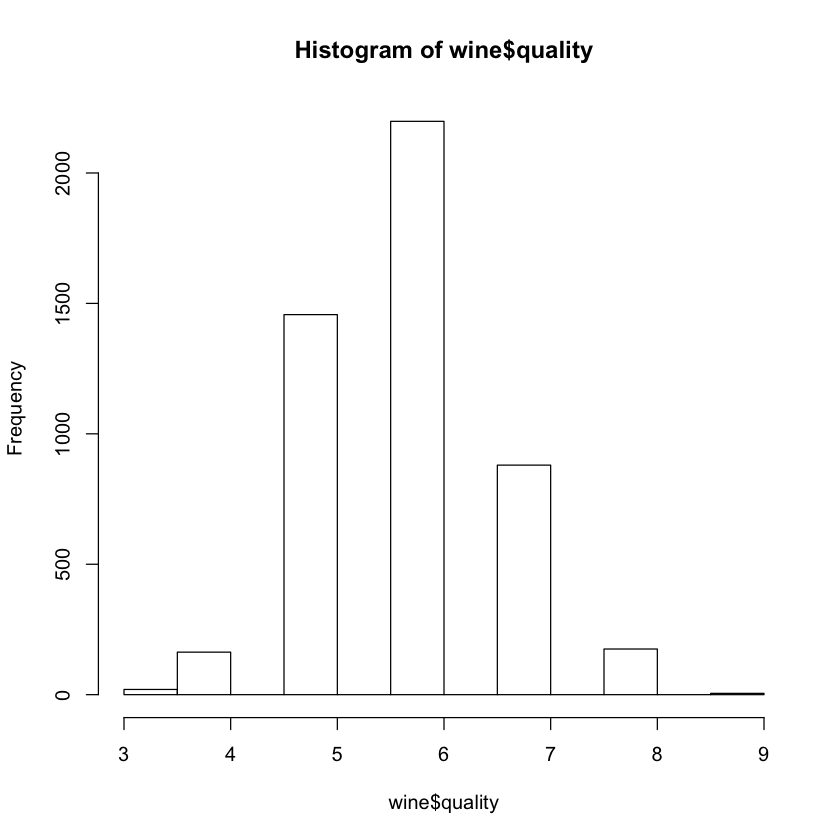

In [2]:
##
## Histograma
##
hist(wine$quality)

### Entrenamiento del modelo

In [3]:
##
## conjuntos de entrenamiento y prueba
##
wine_train <- wine[1:3750, ]
wine_test <- wine[3751:4898, ]

## Se estima un árbol de regresión
## install.packages("rpart")
##
library(rpart)

##
## la calidad es función de todas las variables
## del data.frame
##
m.rpart <- rpart(quality ~ ., data = wine_train)
m.rpart

In [6]:
summary(m.rpart) 

Call:
rpart(formula = quality ~ ., data = wine_train)
  n= 3750 

          CP nsplit rel error    xerror       xstd
1 0.17816211      0 1.0000000 1.0005029 0.02388807
2 0.04439109      1 0.8218379 0.8226476 0.02237304
3 0.02890893      2 0.7774468 0.7885924 0.02214391
4 0.01655575      3 0.7485379 0.7601107 0.02098534
5 0.01108600      4 0.7319821 0.7458587 0.02047927
6 0.01000000      5 0.7208961 0.7446964 0.02038302

Variable importance
             alcohol              density            chlorides 
                  38                   23                   12 
    volatile.acidity total.sulfur.dioxide  free.sulfur.dioxide 
                  12                    7                    6 
           sulphates                   pH       residual.sugar 
                   1                    1                    1 

Node number 1: 3750 observations,    complexity param=0.1781621
  mean=5.886933, MSE=0.8373493 
  left son=2 (2473 obs) right son=3 (1277 obs)
  Primary splits:
      alco

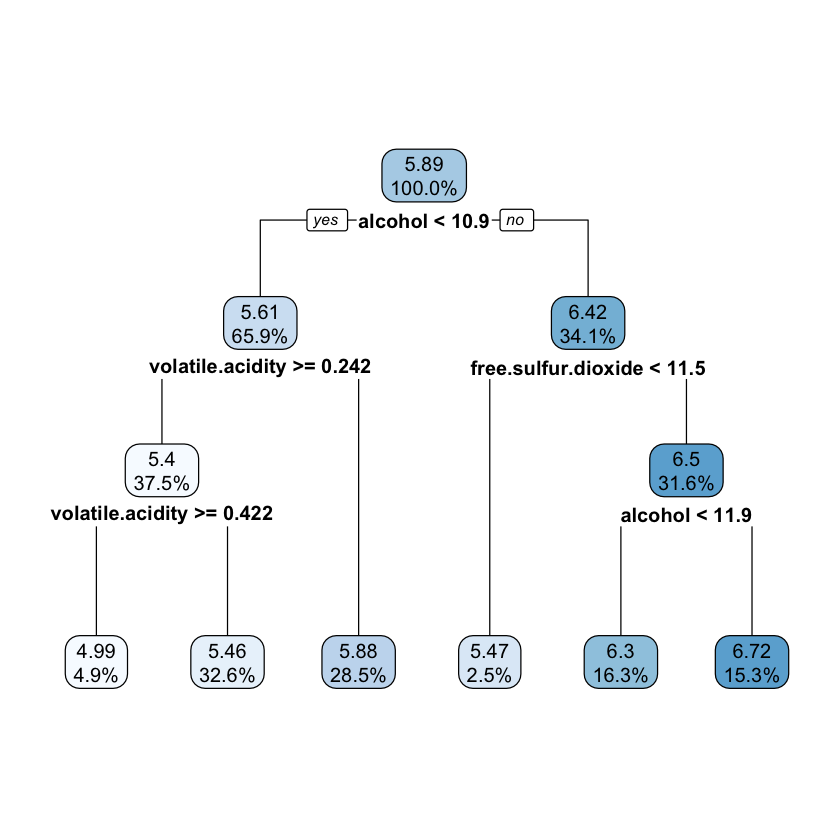

In [8]:
## install.packages("rpart.plot")
library(rpart.plot)
rpart.plot(m.rpart, digits = 3)

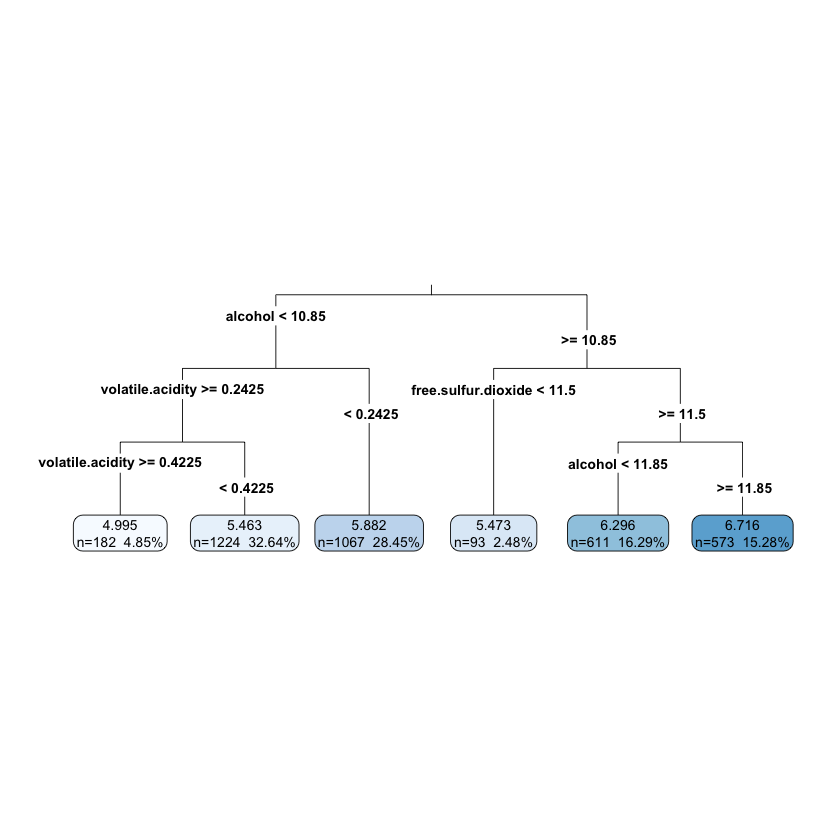

In [9]:
rpart.plot(m.rpart, 
           digits = 4, 
           fallen.leaves = TRUE,
           type = 3, 
           extra = 101)

## Evaluación del modelo

In [10]:
##
## Pronóstico para la muestra de prueba
##
p.rpart <- predict(m.rpart, wine_test)

##
## se compara la distribución de la salida 
## del árbol contra la salida real
##
summary(p.rpart)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.995   5.463   5.882   5.999   6.296   6.716 

In [11]:
summary(wine_test$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.848   6.000   8.000 

In [12]:
##
## se define el error medio absoluto para
## evaluar el desempeño del modelo
##
MAE <- function(actual, predicted) {
    mean(abs(actual - predicted))
}

MAE(p.rpart, wine_test$quality)

[1] 0.5732104

In [13]:
##
## media de la variable de salida
## para la muestra de entrenamiento
##
mean(wine_train$quality)

[1] 5.886933

In [14]:
##
## Valor esperado para el MAE respecto
## a los datos
##
MAE(5.89, wine_test$quality)

[1] 0.5741115